In [63]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [64]:
conn = sqlite3.connect('Data/im.db')


In [65]:
imdb_movie_ratings = pd.read_sql('''
SELECT *

FROM movie_ratings
    JOIN movie_basics
    USING (movie_id)

''', conn)
imdb_movie_ratings = imdb_movie_ratings.drop(['movie_id', 'averagerating', 'numvotes', 'start_year'], axis = 1)

In [66]:
imdb_movie_ratings = imdb_movie_ratings[(imdb_movie_ratings['original_title'].isin(titles))| (imdb_movie_ratings['primary_title'].isin(titles))]

imdb_movie_ratings



,primary_title,original_title,runtime_minutes,genres
3,The Legend of Hercules,The Legend of Hercules,99.0,"Action,Adventure,Fantasy"
6,The Hammer,Hamill,108.0,"Biography,Drama,Sport"
10,Baggage Claim,Baggage Claim,96.0,Comedy
16,Moneyball,Moneyball,133.0,"Biography,Drama,Sport"
17,Hereafter,Hereafter,129.0,"Drama,Fantasy,Romance"
...,...,...,...,...
73568,Let Me In,Let Me In,74.0,Horror
73587,Edmond,Edmond,110.0,"Comedy,Drama,History"
73712,Teefa in Trouble,Teefa in Trouble,155.0,"Action,Comedy,Crime"
73787,Heroes,Heroes,88.0,Documentary


In [67]:
people = pd.read_sql('''
SELECT p.person_id, p.category, mb.primary_title, pe.primary_name

FROM principals as p
    JOIN movie_basics as mb
    USING(movie_id)
    JOIN persons as pe
    USING (person_id)
    
''', conn)



In [181]:
reg_lang = pd.read_sql('''
SELECT mak.language, mak.region, mb.primary_title

FROM movie_akas as mak
    JOIN movie_basics as mb
    USING(movie_id)
    
    
''', conn)
language_dict = {
    'bg': 'Bulgarian',
    'he': 'Hebrew',
    'fr': 'French',
    'tr': 'Turkish',
    'ka': 'Georgian',
    'ta': 'Tamil',
    'te': 'Telugu',
    'en': 'English',
    'sv': 'Swedish',
    'hr': 'Croatian',
    'sl': 'Slovenian',
    'ca': 'Catalan',
    'fa': 'Persian',
    'es': 'Spanish',
    'cs': 'Czech',
    'nl': 'Dutch',
    'sr': 'Serbian',
    'sk': 'Slovak',
    'et': 'Estonian',
    'it': 'Italian',
    'hu': 'Hungarian',
    'da': 'Danish',
    'de': 'German',
    'el': 'Greek',
    'pt': 'Portuguese',
    'fi': 'Finnish',
    'no': 'Norwegian',
    'ru': 'Russian',
    'uk': 'Ukrainian',
    'ro': 'Romanian',
    'lt': 'Lithuanian',
    'cmn': 'Mandarin Chinese',
    'bs': 'Bosnian',
    'hi': 'Hindi',
    'th': 'Thai',
    'ms': 'Malay',
    'ar': 'Arabic',
    'qbp': None,  # You have 'qbp' with no corresponding full name.
    'ml': 'Malayalam',
    'yue': 'Cantonese',
    'qbn': None,  # You have 'qbn' with no corresponding full name.
    'id': 'Indonesian',
    'gl': 'Galician',
    'ga': 'Irish',
    'mr': 'Marathi',
    'pl': 'Polish',
    'tl': 'Tagalog',
    'vi': 'Vietnamese',
    'eu': 'Basque',
    'ja': 'Japanese',
    'bn': 'Bengali',
    'ur': 'Urdu'
}
reg_lang = reg_lang.replace(({"language": language_dict}))

reg_lang_money = pd.merge(reg_lang, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')
reg_lang_money

,language,region,primary_title,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,Bulgarian,BG,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
1,None,JP,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
2,None,BR,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
3,None,BR,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
4,None,FR,Jurassic World,Jurassic World,Uni.,1019.4,2015.0,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,3.033817,0.000005,7.669092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44602,None,CZ,Aladdin,Aladdin,NaN,372500000.0,NaN,81.0,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,1.355683,2.046703,3.402386
44603,None,CZ,Aladdin,Aladdin,NaN,286700000.0,NaN,33.0,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,7.762508,10.239286,18.001794
44604,None,None,Never Again,Never Again,NaN,1162.0,NaN,47.0,"Jul 12, 2002",500000.0,307631.0,3.087930e+05,0.615262,0.002324,0.617586
44605,English,XWW,Never Again,Never Again,NaN,1162.0,NaN,47.0,"Jul 12, 2002",500000.0,307631.0,3.087930e+05,0.615262,0.002324,0.617586


In [69]:
people = people[people['primary_title'].isin(titles)]
people.primary_title.value_counts()

primary_title
Home                           128
The Return                     126
The Gift                        99
Forget Me Not                   87
Freedom                         85
                              ... 
Step Up                          1
The Touch                        1
Ghost Town                       1
Cube                             1
The Best Years of Our Lives      1
Name: count, Length: 2088, dtype: int64

In [70]:
imdb_ratings_money = pd.merge(imdb_movie_ratings, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')
imdb_ratings_money = imdb_ratings_money.drop(['primary_title', 'original_title', 'studio', 'year', 'id', 'release_date'], axis = 1)

In [71]:
people

,person_id,category,primary_title,primary_name
36,nm0005683,cinematographer,"Hail, Caesar!",Roger Deakins
37,nm0000982,actor,"Hail, Caesar!",Josh Brolin
38,nm0000123,actor,"Hail, Caesar!",George Clooney
39,nm2403277,actor,"Hail, Caesar!",Alden Ehrenreich
40,nm0000146,actor,"Hail, Caesar!",Ralph Fiennes
...,...,...,...,...
1026920,nm9952460,producer,Never Again,Katie Watling
1026921,nm9952477,composer,Never Again,Ben Gordelia
1026922,nm9953797,cinematographer,Never Again,Michael Wooley
1027885,nm3868049,actor,Fuel,Maarten Wijsman


In [153]:
low_budget_ratings = imdb_ratings_money[imdb_ratings_money['production_budget'] < 5000000]
low_budget_ratings_moneymaker = low_budget_ratings[low_budget_ratings['WW_success'] > 1]


In [155]:


mid_budget_ratings = imdb_ratings_money[(imdb_ratings_money['production_budget'] > 5000000) & (imdb_ratings_money['production_budget'] < 50000000)]
mid_budget_ratings_moneymaker = mid_budget_ratings[mid_budget_ratings['WW_success'] > 1]

In [156]:
high_budget_ratings = imdb_ratings_money[imdb_ratings_money['production_budget'] > 50000000]
high_budget_ratings_moneymaker = high_budget_ratings[high_budget_ratings['WW_success'] > 1]

In [144]:
low_budget_no_outlier = low_budget[low_budget['WW_success'] < 1400]

In [145]:
low_budget_no_outlier.describe().iloc[:,-3:]


,domestic_success,foreign_success,WW_success
count,1103.000000,1103.000000,1103.000000
mean,7.548329,3.880865,11.436967
std,24.148013,20.927349,38.782807
min,0.000000,0.000000,0.000026
25%,0.075369,0.000000,0.212818
50%,0.940931,0.015823,1.680090
75%,4.860685,1.033288,7.035708
max,291.560000,455.000000,498.750000


Text(0, 0.5, 'Worldwide Success')

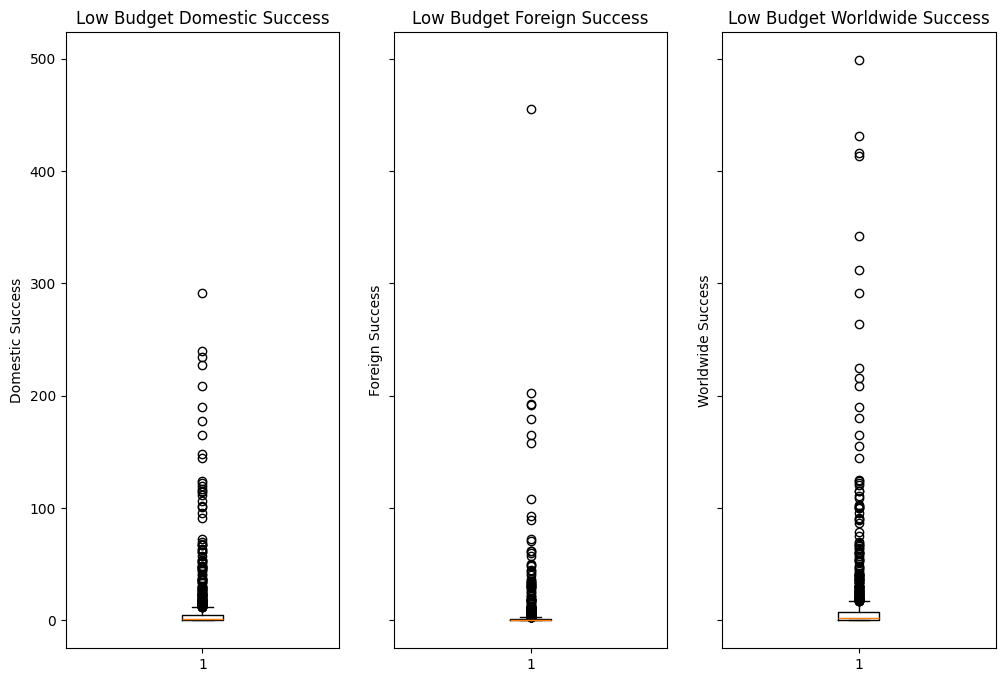

In [150]:
#boxplot = low_budget_no_outlier.boxplot(column=['domestic_success', 'foreign_success', 'WW_success'])
fig, ax = plt.subplots(1,3, figsize = (12,8), sharey= True)

ax[0].boxplot(low_budget_no_outlier['domestic_success'])

ax[0].set_title('Low Budget Domestic Success')
ax[0].set_ylabel('Domestic Success')

ax[1].boxplot(low_budget_no_outlier['foreign_success'])
ax[1].set_title('Low Budget Foreign Success')
ax[1].set_ylabel('Foreign Success')

ax[2].boxplot(low_budget_no_outlier['WW_success'])
ax[2].set_title('Low Budget Worldwide Success')
ax[2].set_ylabel('Worldwide Success')

In [76]:
mid_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,2975.000000,2975.000000,2975.000000
mean,1.743540,1.330433,3.072227
std,2.633854,2.729720,4.748629
min,0.000000,0.000000,0.000125
25%,0.318128,0.005589,0.625621
50%,0.997365,0.396364,1.722419
75%,2.157811,1.495109,3.609725
max,41.908910,43.675071,75.520507


Text(0, 0.5, 'Worldwide Success')

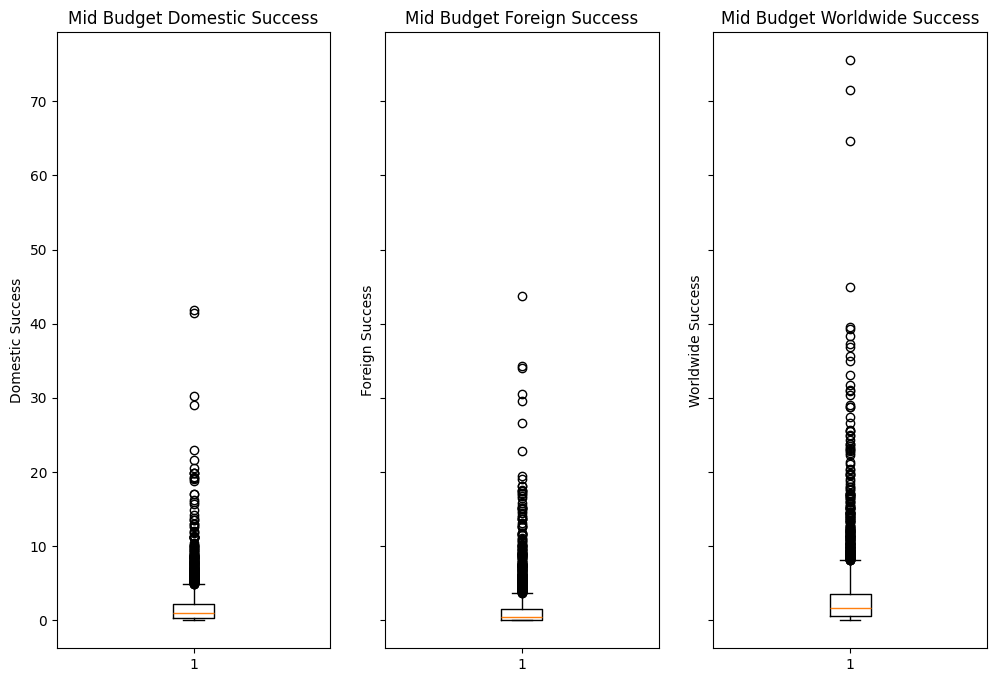

In [151]:
#boxplot = mid_budget.boxplot(column=['domestic_success', 'foreign_success', 'WW_success'])

fig, ax = plt.subplots(1,3, figsize = (12,8), sharey= True)

ax[0].boxplot(mid_budget['domestic_success'])

ax[0].set_title('Mid Budget Domestic Success')
ax[0].set_ylabel('Domestic Success')

ax[1].boxplot(mid_budget['foreign_success'])
ax[1].set_title('Mid Budget Foreign Success')
ax[1].set_ylabel('Foreign Success')

ax[2].boxplot(mid_budget['WW_success'])
ax[2].set_title('Mid Budget Worldwide Success')
ax[2].set_ylabel('Worldwide Success')


In [77]:
high_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,1073.000000,1073.000000,1073.000000
mean,1.162799,1.640720,2.817022
std,0.890666,1.484321,2.224842
min,0.000000,0.000000,0.007943
25%,0.556753,0.648000,1.295164
50%,0.934403,1.278333,2.284781
75%,1.512535,2.241389,3.667582
max,6.303232,12.494545,16.489089


Text(0, 0.5, 'Worldwide Success')

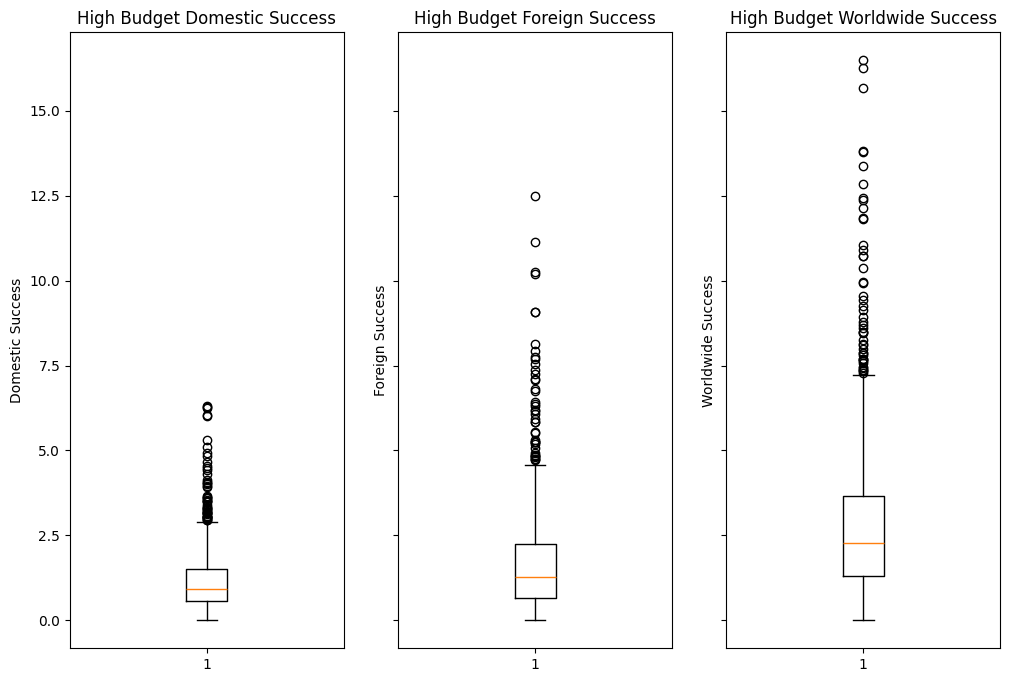

In [152]:
#boxplot = high_budget.boxplot(column=['domestic_success', 'foreign_success', 'WW_success'])

fig, ax = plt.subplots(1,3, figsize = (12,8), sharey= True)

ax[0].boxplot(high_budget['domestic_success'])

ax[0].set_title('High Budget Domestic Success')
ax[0].set_ylabel('Domestic Success')

ax[1].boxplot(high_budget['foreign_success'])
ax[1].set_title('High Budget Foreign Success')
ax[1].set_ylabel('Foreign Success')

ax[2].boxplot(high_budget['WW_success'])
ax[2].set_title('High Budget Worldwide Success')
ax[2].set_ylabel('Worldwide Success')


Text(0.5, 0, 'Runtime (minutes)')

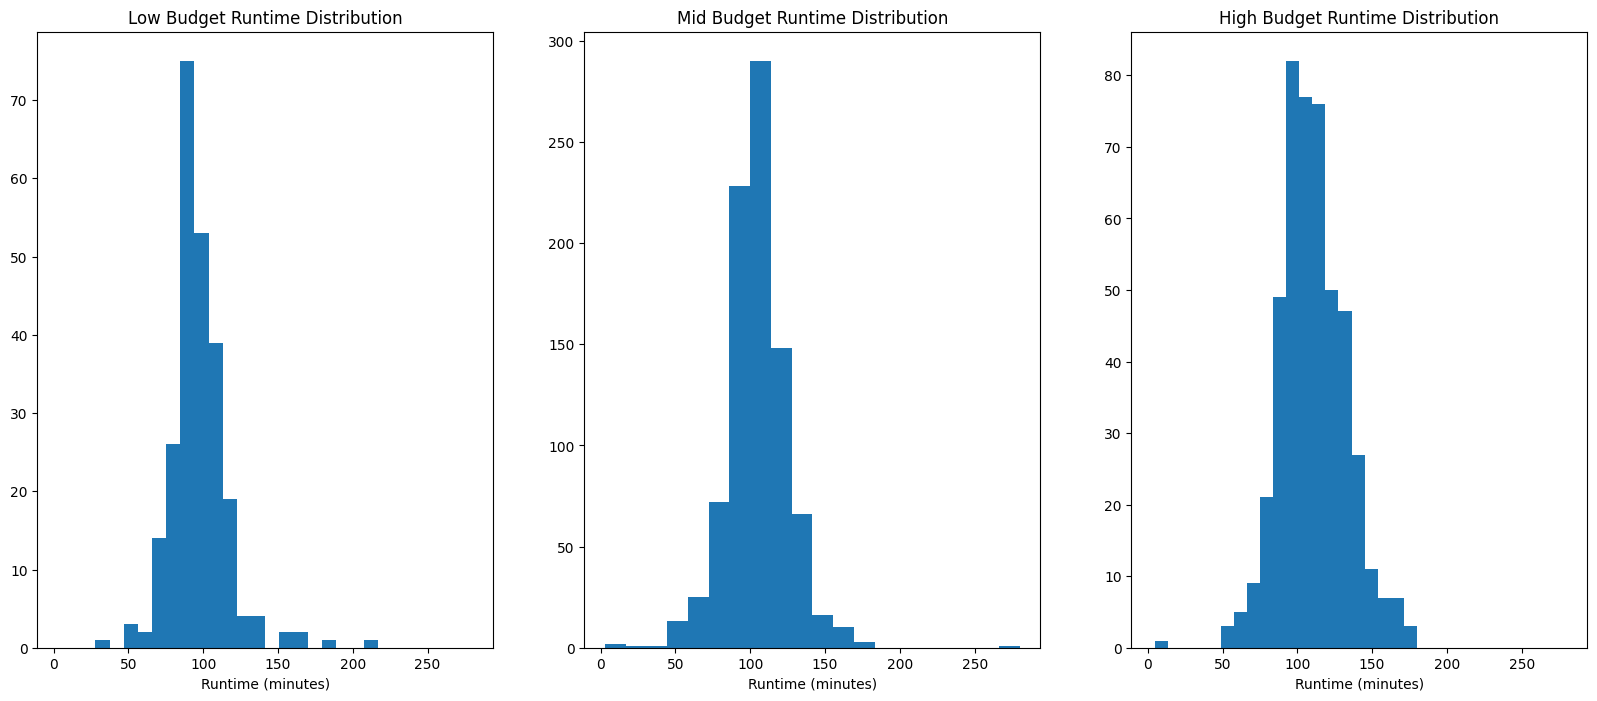

In [162]:
fig, ax = plt.subplots(1,3, figsize = (20,8), sharex = True)

ax[0].hist(low_budget_ratings_moneymaker['runtime_minutes'], bins = 20)


ax[1].hist(mid_budget_ratings_moneymaker['runtime_minutes'],bins = 20)
ax[2].hist(high_budget_ratings_moneymaker['runtime_minutes'],bins = 20)

ax[0].set_title('Low Budget Runtime Distribution')
ax[0].set_xlabel('Runtime (minutes)')
ax[1].set_title('Mid Budget Runtime Distribution')
ax[1].set_xlabel('Runtime (minutes)')
ax[2].set_title('High Budget Runtime Distribution')
ax[2].set_xlabel('Runtime (minutes)')

In [170]:
x_bar = np.mean(low_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(low_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(low_budget_ratings_moneymaker['runtime_minutes']))
print('Sample mean:', x_bar)
print('Sample standard deviation:', s)
print('Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(low_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Sample mean: 97.28048780487805
Sample standard deviation: 20.114939756154584
Estimated standard error: 1.262123572000353


(94.79488082113282, 99.76609478862328)

In [171]:
x_bar = np.mean(mid_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(mid_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(mid_budget_ratings_moneymaker['runtime_minutes']))
print('Sample mean:', x_bar)
print('Sample standard deviation:', s)
print('Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(mid_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Sample mean: 104.62785388127854
Sample standard deviation: 20.750784642384605
Estimated standard error: 0.6859997795684019


(103.28153619928904, 105.97417156326804)

In [172]:
x_bar = np.mean(high_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(high_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(high_budget_ratings_moneymaker['runtime_minutes']))
print('Sample mean:', x_bar)
print('Sample standard deviation:', s)
print('Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(high_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Sample mean: 110.26947368421052
Sample standard deviation: 22.039641470221547
Estimated standard error: 0.999738439183823


(108.30512032949873, 112.23382703892231)

In [82]:
low_budget.describe()

,foreign_gross,year,id,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
count,1.104000e+03,76.000000,1104.000000,1.104000e+03,1.104000e+03,1.104000e+03,1104.000000,1104.000000,1104.000000
mean,4.289926e+06,2012.315789,49.422101,1.901842e+06,7.594724e+06,1.188825e+07,9.171927,3.877350,13.057042
std,1.645862e+07,2.488429,28.359327,1.376585e+06,1.806141e+07,2.972851e+07,59.100067,20.918187,66.335127
min,0.000000e+00,2010.000000,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,0.000000,0.000000,0.000026
25%,0.000000e+00,2010.000000,25.000000,7.492500e+05,9.182575e+04,2.149535e+05,0.075408,0.000000,0.212978
50%,1.665450e+04,2011.500000,49.000000,1.700000e+06,1.066455e+06,2.392622e+06,0.941282,0.015809,1.686642
75%,1.278550e+06,2014.000000,73.250000,3.000000e+06,7.011462e+06,1.026181e+07,4.895456,1.033265,7.058571
max,2.152993e+08,2018.000000,100.000000,4.900000e+06,1.986805e+08,3.905252e+08,1800.000000,455.000000,1800.000000


In [83]:
low_budget_ratings['genres'] = low_budget_ratings['genres'].str.split(',')
mid_budget_ratings['genres'] = mid_budget_ratings['genres'].str.split(',')
high_budget_ratings['genres'] = high_budget_ratings['genres'].str.split(',')

In [84]:
low_budget_genres = low_budget_ratings.explode('genres')
mid_budget_genres = mid_budget_ratings.explode('genres')
high_budget_genres = high_budget_ratings.explode('genres')

In [85]:
high_budget_genres.groupby('genres').agg(
  avg_wwratio=('WW_success', 'mean'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,avg_wwratio,rng
genres,,
Action,2.864333,13.802843
Adventure,3.377832,15.672276
Animation,3.965981,15.416554
Biography,3.534412,16.002074
Comedy,3.335743,15.562981
Crime,2.388188,7.722891
Documentary,2.001001,5.203836
Drama,2.543846,16.264518
Family,3.027948,8.231997


In [86]:
high_budget_genres['genres'].value_counts()

genres
Adventure      273
Action         263
Drama          169
Comedy         152
Animation       87
Sci-Fi          85
Thriller        81
Fantasy         73
Crime           49
Family          48
Horror          30
Mystery         26
Documentary     25
Romance         24
Biography       22
History         11
Musical          8
Sport            6
War              4
Western          4
Music            2
Name: count, dtype: int64

In [87]:
mid_budget_genres.groupby('genres').agg(
  avg_wwratio=('WW_success', 'mean'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,avg_wwratio,rng
genres,,
Action,2.744433,31.016138
Adventure,2.444137,18.001309
Animation,2.170929,14.439274
Biography,2.764647,31.012152
Comedy,2.968782,24.362710
Crime,2.153716,19.534314
Documentary,2.935400,19.677644
Drama,2.739058,31.016044
Family,3.409208,30.411688


In [88]:
mid_budget_genres['genres'].value_counts()

genres
Drama          831
Comedy         390
Action         258
Thriller       243
Crime          216
Romance        203
Horror         149
Biography      139
Adventure      117
Mystery        109
Documentary     89
Sci-Fi          67
Family          62
Fantasy         59
History         49
Music           45
Sport           34
War             29
Animation       29
Musical          6
Western          5
News             2
Name: count, dtype: int64

In [89]:
low_budget_genres.groupby('genres').agg(
  median_wwratio=('WW_success', 'median'),
  rng=("WW_success", lambda x: (max(x) - min(x))))

,median_wwratio,rng
genres,,
Action,0.495899,224.999974
Adventure,0.388954,89.585736
Animation,36.824336,89.029276
Biography,0.338855,312.350668
Comedy,0.653821,224.999974
Crime,0.936367,63.117534
Documentary,0.623237,312.354120
Drama,1.079151,224.999974
Family,1.115523,90.892991


In [90]:
low_budget_genres['genres'].value_counts()

genres
Drama          283
Comedy         112
Horror          93
Thriller        84
Romance         65
Documentary     58
Crime           41
Action          41
Mystery         41
Sci-Fi          26
Adventure       25
Fantasy         23
Music           19
Family          18
Biography       16
Sport           13
History          7
War              5
Western          4
Musical          4
Animation        3
News             1
Name: count, dtype: int64

In [91]:
low_budget_rt_nonan = low_budget_ratings.dropna()
mid_budget_rt_nonan = mid_budget_ratings.dropna()
high_budget_rt_nonan = high_budget_ratings.dropna()

Our regression line is: y = -0.12492x + 22.1747


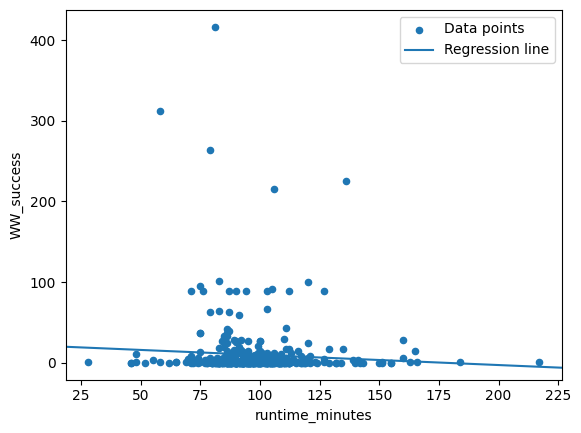

In [92]:
rho = np.corrcoef(low_budget_rt_nonan["runtime_minutes"], low_budget_rt_nonan["WW_success"])[0][1]
s_y = low_budget_rt_nonan["WW_success"].std()
s_x = low_budget_rt_nonan["runtime_minutes"].std()
m = rho * s_y / s_x


mean_y = low_budget_rt_nonan["WW_success"].mean()
mean_x = low_budget_rt_nonan["runtime_minutes"].mean()
c = mean_y - m * mean_x
model = sm.OLS(endog=low_budget_rt_nonan["WW_success"], exog=sm.add_constant(low_budget_rt_nonan["runtime_minutes"]))
print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")
results_low = model.fit()

fig, ax = plt.subplots()
low_budget_rt_nonan.plot.scatter(x="runtime_minutes", y="WW_success", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results_low, label="Regression line", ax=ax)
ax.legend();


In [93]:
results_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             WW_success   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.216
Date:                Wed, 03 Jan 2024   Prob (F-statistic):              0.137
Time:                        09:36:23   Log-Likelihood:                -2315.2
No. Observations:                 468   AIC:                             4634.
Df Residuals:                     466   BIC:                             4643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.1747      8.339      2.659      0.008       5.788      38.561
runtime_minutes    -0.1249      0.084     -1.489      0.137      -0.290       0.040
==============================================================================
Omnibus:                      654.636   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88751.756
Skew:                           7.310   Prob(JB):                         0.00
Kurtosis:                      68.861   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our regression line is: y = 0.01102x + 1.7304


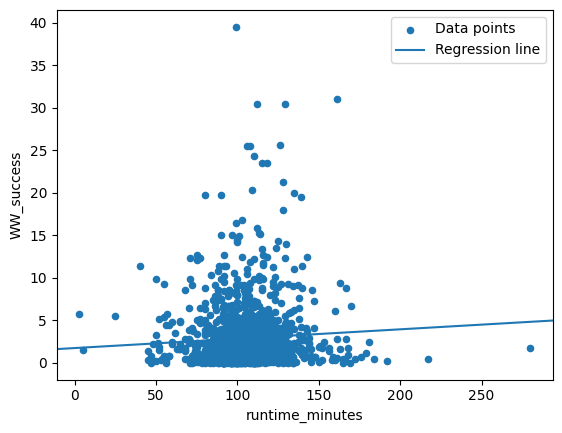

In [94]:
rho = np.corrcoef(mid_budget_rt_nonan["runtime_minutes"], mid_budget_rt_nonan["WW_success"])[0][1]
s_y = mid_budget_rt_nonan["WW_success"].std()
s_x = mid_budget_rt_nonan["runtime_minutes"].std()
m = rho * s_y / s_x


mean_y = mid_budget_rt_nonan["WW_success"].mean()
mean_x = mid_budget_rt_nonan["runtime_minutes"].mean()
c = mean_y - m * mean_x
model = sm.OLS(endog=mid_budget_rt_nonan["WW_success"], exog=sm.add_constant(mid_budget_rt_nonan["runtime_minutes"]))
print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")
results_mid = model.fit()

fig, ax = plt.subplots()
mid_budget_rt_nonan.plot.scatter(x="runtime_minutes", y="WW_success", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results_mid, label="Regression line", ax=ax)
ax.legend();


In [95]:
results_mid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             WW_success   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.011
Date:                Wed, 03 Jan 2024   Prob (F-statistic):             0.0254
Time:                        09:36:23   Log-Likelihood:                -3691.5
No. Observations:                1340   AIC:                             7387.
Df Residuals:                    1338   BIC:                             7397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7304      0.523      3.309      0.001       0.705       2.756
runtime_minutes     0.0110      0.005      2.238      0.025       0.001       0.021
==============================================================================
Omnibus:                     1039.426   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21570.847
Skew:                           3.489   Prob(JB):                         0.00
Kurtosis:                      21.375   Cond. No.                         534.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our regression line is: y = 0.00783x + 2.09906


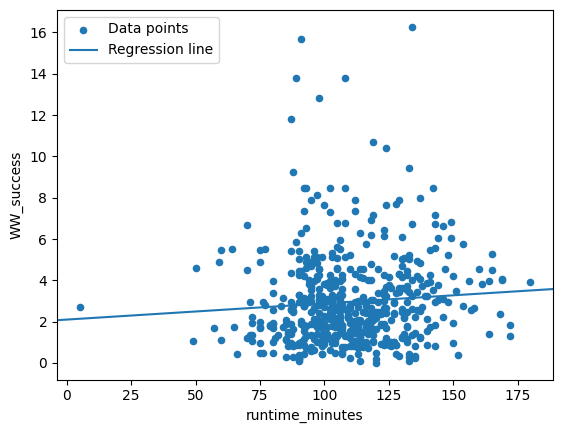

In [96]:
rho = np.corrcoef(high_budget_rt_nonan["runtime_minutes"], high_budget_rt_nonan["WW_success"])[0][1]
s_y = high_budget_rt_nonan["WW_success"].std()
s_x = high_budget_rt_nonan["runtime_minutes"].std()
m = rho * s_y / s_x


mean_y = high_budget_rt_nonan["WW_success"].mean()
mean_x = high_budget_rt_nonan["runtime_minutes"].mean()
c = mean_y - m * mean_x
model = sm.OLS(endog=high_budget_rt_nonan["WW_success"], exog=sm.add_constant(high_budget_rt_nonan["runtime_minutes"]))
print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")
results_high = model.fit()

fig, ax = plt.subplots()
high_budget_rt_nonan.plot.scatter(x="runtime_minutes", y="WW_success", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results_high, label="Regression line", ax=ax)
ax.legend();


In [97]:
results_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             WW_success   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.186
Date:                Wed, 03 Jan 2024   Prob (F-statistic):             0.0748
Time:                        09:36:24   Log-Likelihood:                -1206.8
No. Observations:                 545   AIC:                             2418.
Df Residuals:                     543   BIC:                             2426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0991      0.492      4.265      0.000       1.132       3.066
runtime_minutes     0.0078      0.004      1.785      0.075      -0.001       0.016
==============================================================================
Omnibus:                      258.375   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1466.679
Skew:                           2.054   Prob(JB):                         0.00
Kurtosis:                       9.907   Cond. No.                         581.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
people_money = pd.merge(people, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')

In [99]:
people_money

,person_id,category,primary_title,primary_name,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,nm0005683,cinematographer,"Hail, Caesar!",Roger Deakins,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
1,nm0000982,actor,"Hail, Caesar!",Josh Brolin,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
2,nm0000123,actor,"Hail, Caesar!",George Clooney,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
3,nm2403277,actor,"Hail, Caesar!",Alden Ehrenreich,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
4,nm0000146,actor,"Hail, Caesar!",Ralph Fiennes,"Hail, Caesar!",NaN,34080455.0,NaN,22.0,"Feb 5, 2016",22000000.0,30080225.0,64160680.0,1.367283,1.549112,2.916395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29276,nm9457390,director,Beowulf,Chase Pottinger,Beowulf,NaN,112800000.0,NaN,88.0,"Nov 16, 2007",150000000.0,82280579.0,195080579.0,0.548537,0.752000,1.300537
29277,nm9457392,producer,Beowulf,Eerdun E,Beowulf,NaN,112800000.0,NaN,88.0,"Nov 16, 2007",150000000.0,82280579.0,195080579.0,0.548537,0.752000,1.300537
29278,nm9457388,producer,Beowulf,Junsheng Liu,Beowulf,NaN,112800000.0,NaN,88.0,"Nov 16, 2007",150000000.0,82280579.0,195080579.0,0.548537,0.752000,1.300537
29279,nm3868049,actor,Fuel,Maarten Wijsman,Fuel,NaN,0.0,NaN,35.0,"Nov 14, 2008",2500000.0,174255.0,174255.0,0.069702,0.000000,0.069702


In [100]:
people_money.groupby(['primary_name', 'category']).agg(
  median_wwratio=('WW_success', 'median'),
  rng=("WW_success", lambda x: (max(x) - min(x)))).sort_values('median_wwratio', ascending = False)

,,median_wwratio,rng
primary_name,category,,
Chris Lofing,director,416.564740,0.0
Pfeifer Brown,actress,416.564740,0.0
Benjamin Forkner,producer,416.564740,0.0
Reese Mishler,actor,416.564740,0.0
Travis Cluff,director,416.564740,0.0
...,...,...,...
Matt Odom,editor,0.000026,0.0
Tom Riordan,actor,0.000026,0.0
Jack Griffo,actor,0.000026,0.0


In [182]:

reg_lang_money.groupby('language').agg(
  mean_foreignratio=('foreign_success', 'mean'),
  rng=("WW_success", lambda x: (max(x) - min(x)))).sort_values('mean_foreignratio', ascending = False)

,mean_foreignratio,rng
language,,
Indonesian,7.964119,39.270431
Malay,5.838000,0.000000
Japanese,5.555385,0.000000
Croatian,4.319700,66.568703
Spanish,3.691638,101.124051
Serbian,3.293764,27.666042
Mandarin Chinese,3.146008,30.722943
Hungarian,3.097919,12.706333
English,3.076113,215.384477


In [183]:
reg_lang_low_budget = pd.merge(reg_lang, low_budget, left_on = 'primary_title', right_on = 'title')
reg_lang_mid_budget = pd.merge(reg_lang, mid_budget, left_on = 'primary_title', right_on = 'title')
reg_lang_high_budget = pd.merge(reg_lang, high_budget, left_on = 'primary_title', right_on = 'title')

In [204]:
median_lowbudget_lang = reg_lang_low_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)
median_lowbudget_lang = median_lowbudget_lang.reset_index()
median_lowbudget_lang

,language,median_foreignratio,rng
0,Spanish,24.415916,48.168169
1,Cantonese,12.735053,24.384001
2,Serbian,5.890809,11.718063
3,Tamil,5.218493,0.000000
4,Croatian,2.571429,30.933333
5,French,2.398457,202.000000
6,German,2.398457,3.068037
7,Bosnian,1.866667,5.058421
8,Hebrew,1.344000,89.555470
9,Bulgarian,1.344000,89.555470


In [190]:
reg_lang_low_budget['language'].value_counts()

language
English             144
Turkish             140
Bulgarian           119
French               90
Hebrew               73
Croatian             13
Swedish              12
Persian               7
Catalan               5
Bosnian               5
German                5
Arabic                3
Mandarin Chinese      3
Spanish               2
Serbian               2
Cantonese             2
Dutch                 2
Tamil                 1
Indonesian            1
Russian               1
Name: count, dtype: int64

In [205]:
low_budget_language = ['English', 'Turkish', 'Bulgarian', 'French', 'Hebrew', 'Croatian', 'Swedish']
median_lowbudget_lang = median_lowbudget_lang[median_lowbudget_lang['language'].isin(low_budget_language)]
median_lowbudget_lang

,language,median_foreignratio,rng
4,Croatian,2.571429,30.933333
5,French,2.398457,202.000000
8,Hebrew,1.344000,89.555470
9,Bulgarian,1.344000,89.555470
14,English,0.941053,89.555470
15,Turkish,0.898672,202.000000
16,Swedish,0.870198,4.412037


In [207]:
median_midbudget_lang = reg_lang_mid_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)
median_midbudget_lang = median_midbudget_lang.reset_index()
median_midbudget_lang

,language,median_foreignratio,rng
0,Indonesian,26.584615,0.000000
1,Arabic,6.738462,11.608300
2,Hungarian,2.909048,9.978261
3,Finnish,2.600000,0.000000
4,Croatian,2.440000,13.626667
5,Basque,2.330000,0.000000
6,Spanish,2.201750,10.867176
7,German,2.163636,9.511014
8,Greek,1.543333,3.709806
9,Catalan,1.386400,9.491176


In [191]:
reg_lang_mid_budget['language'].value_counts()

language
French              729
Bulgarian           690
Turkish             685
English             616
Hebrew              511
Swedish              41
Persian              34
Croatian             30
Catalan              28
Mandarin Chinese     27
Spanish              18
Bosnian              14
Cantonese            13
Hindi                11
German                9
Serbian               9
Italian               7
Tamil                 7
Hungarian             4
Czech                 3
Arabic                3
Greek                 3
Thai                  3
Dutch                 2
Indonesian            2
Portuguese            1
Russian               1
Finnish               1
Slovenian             1
Telugu                1
Basque                1
Name: count, dtype: int64

In [208]:
mid_budget_language = ['English', 'Turkish', 'Bulgarian', 'French', 'Hebrew', 'Croatian', 'Swedish', 'Persian', 'Catalan', 'Mandarin Chinese', 'Spanish', 'Bosnian', 'Cantonese', 'Hindi']
median_midbudget_lang = median_midbudget_lang[median_midbudget_lang['language'].isin(mid_budget_language)]
median_midbudget_lang

,language,median_foreignratio,rng
4,Croatian,2.440000,13.626667
6,Spanish,2.201750,10.867176
9,Catalan,1.386400,9.491176
10,Persian,1.372340,11.618693
11,Swedish,1.321739,10.648806
12,Mandarin Chinese,1.254776,30.578947
13,Hebrew,1.152313,26.584615
14,Bosnian,1.083965,8.675000
16,French,0.871111,26.584615
17,Turkish,0.852000,30.578947


In [212]:
median_highbudget_lang = reg_lang_high_budget.groupby('language').agg(
  mean_foreignratio=('foreign_success', 'mean'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('mean_foreignratio', ascending = False)
median_highbudget_lang = median_highbudget_lang.reset_index()
median_highbudget_lang

high_budget_language = ['English', 'Turkish', 'Bulgarian', 'French', 'Hebrew', 'Croatian', 'Swedish', 'Persian', 'Catalan', 'Mandarin Chinese', 'Spanish', 'Bosnian', 'Cantonese', 'Hindi', 'Dutch', 'Tamil', 'Serbian']
median_highbudget_lang = median_highbudget_lang[median_highbudget_lang['language'].isin(high_budget_language)]
median_highbudget_lang



,language,mean_foreignratio,rng
2,Serbian,3.294745,12.298653
3,Dutch,2.790109,6.363152
4,Mandarin Chinese,2.740895,4.841333
5,Persian,2.663413,10.269333
6,Catalan,2.662937,10.505027
9,Hindi,2.202319,3.807453
11,English,2.142723,12.494545
12,Cantonese,2.135174,3.490000
14,Hebrew,2.052969,12.494545
16,Croatian,2.024283,3.720712


In [192]:
reg_lang_high_budget['language'].value_counts()

language
French              452
Bulgarian           414
English             409
Turkish             395
Hebrew              374
Persian              45
Mandarin Chinese     29
Swedish              28
Catalan              27
Spanish              26
Croatian             21
Hindi                20
Dutch                19
Tamil                18
Serbian              15
Cantonese            12
Arabic                7
Italian               6
German                6
Indonesian            5
Thai                  5
Portuguese            4
Bosnian               3
Lithuanian            3
Norwegian             3
Telugu                3
Greek                 3
Hungarian             3
Russian               2
Czech                 2
Bengali               2
Malayalam             2
Slovenian             2
Finnish               2
Romanian              2
Estonian              1
Malay                 1
Slovak                1
Danish                1
Ukrainian             1
Georgian              1
Galicia

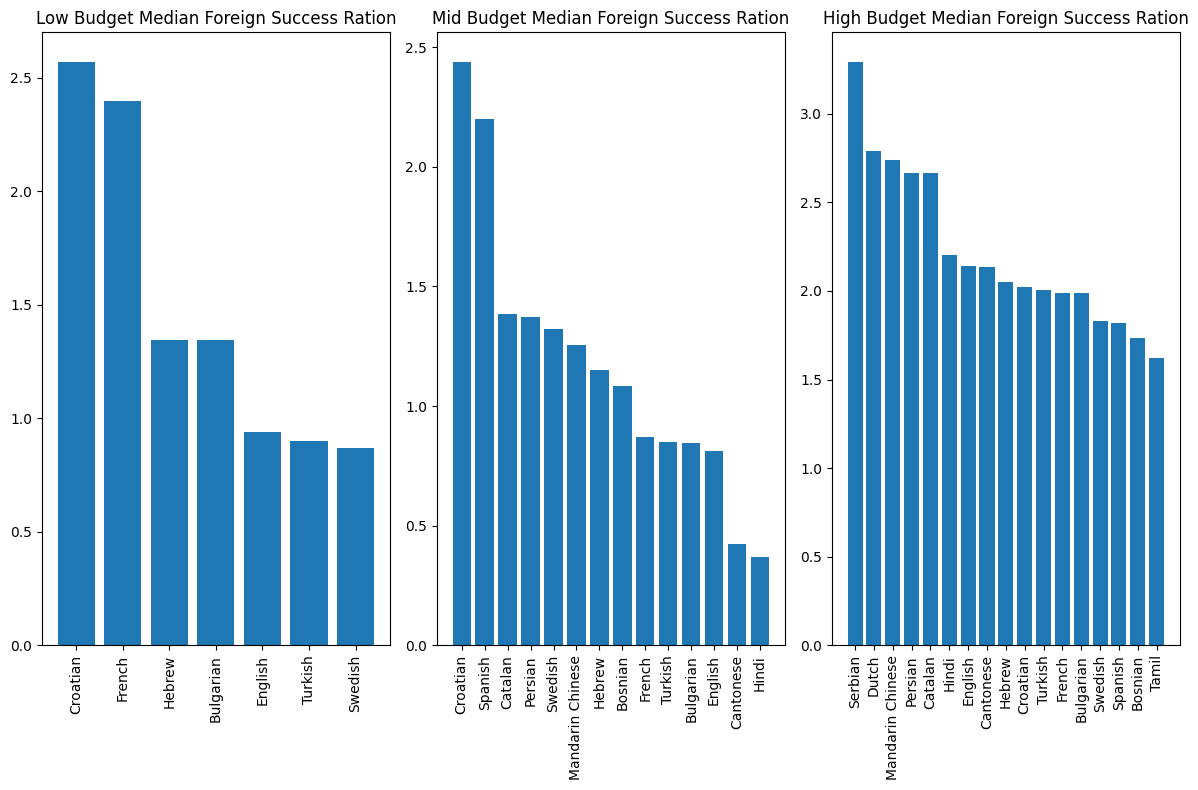

In [229]:
fig, ax = plt.subplots(1,3, figsize = (12,8))

ax[0].bar(median_lowbudget_lang['language'], median_lowbudget_lang['median_foreignratio'])

ax[1].bar(median_midbudget_lang['language'], median_midbudget_lang['median_foreignratio'])

ax[2].bar(median_highbudget_lang['language'], median_highbudget_lang['mean_foreignratio'])

ax[1].tick_params(axis='x', rotation=90)
ax[0].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

ax[0].set_title('Low Budget Median Foreign Success Ration')

ax[1].set_title('Mid Budget Median Foreign Success Ration')

ax[2].set_title('High Budget Median Foreign Success Ration')

fig.tight_layout()